# Aula 8 - KNN

Nessa aula, iremos tratar dos seguintes conteúdos:
- KNN - Classificador;
- KNN - Regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## K Nearest Neighbors ou K-Vizinhos

O modelo K Nearest Neighbors ou K-Vizinhos (KNN) é um modelo de classificação bem simples, onde a ideia de aplicação do modelo é: iremos definir se um dado pertence ou não a uma classe, ou no caso multi classes para quais classes irá pertencer, a partir de cálculos de **distâncias!** <br><br>
Os modelos de KNNs apresentam:
- Algoritmo simples
- Aprendizado supervisionado
- Amplamente estudado
    - Primeira (?) descrição por [Evelyn Fix e Joseph Hodges (1951)](https://apps.dtic.mil/dtic/tr/fulltext/u2/a800276.pdf)
    - Posteriormente expandido por [Thomas Cover (1967)](http://ssg.mit.edu/cal/abs/2000_spring/np_dens/classification/cover67.pdf) (Nearest Neighbor Pattern Classification)
- Amplamente utilizado
- Bom algoritmo para benchmark de performance
- Navalha de Ockham (Occam's razor)
    - **Diante de várias explicações para um problema, a mais simples tende a ser a mais correta**


**Conceitos**:
- Lazy learning
    - Processamento dos exemplos de treino postergado até o modelo realizar as predições
    - Menor tempo "treinando", maior tempo "predizendo"
    - O treinamento consiste em armazenar o dado de treino (fit)!!!
- Categorizado como instance-based (ou "memory-based")
    - Comparação do ponto a ser classificado com o conjunto de dados presentes no set de treino.
    - Diferente de um modelo global.


<img src="https://docs.google.com/uc?export=download&id=1qtI7EuVeoCyoLLYBAqvLzojZpGyNFI5s">



A cada observação nova que devemos classificar, será feito o cálculo de distância das $K$ observações mais próximas em relação ao elemento a ser classificado e de acordo com a classificação desses vizinhos próximos, será definida a classe da observação: 

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

É importante ressaltar que o modelo KNN é **bem simples** de rodar, tem um **custo computacional mais baixo** em relação a outros modelos, mas esse modelo **ele não aprende** com os dados já observados, toda vez que tivermos novos dados serão calculadas todas as ditâncias para definir os elementos mais próximos e assim conseguir classificá-lo.<br><br>

Existem vários tipos de distâncias diferentes que podemos utilizar no KNN, sendo elas: [Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), [Cosseno](https://cmry.github.io/notes/euclidean-v-cosine) e [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).<br><br>

Então basicamente o nosso processo de modelagem envolve as seguintes etapas:

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) de cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, em ordem decrescente;
4. Verifica a classe de cada da um dos *K* dados que tiveram a menor distância e conta a quantidade de cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

Mas sempre que olhamos para o nosso processo de modelagem (como o exemplo acima), a primeira dúvida que vem na cabeça é:

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

**Treinamento:**  
Para cada i = 1, ..., n em um conjunto de dados de treino multidimensional:  
- Armazene o exemplo de treino $(X^{[i]}, y^{[i]})$

**Predição**
Pseudo-código

Para cada ponto do dado de treino,  i = 1, ..., n;
- Descubra a distância $\mathcal{d}(X^{[i]}, X^{[q]} )$, em que $\mathcal{q}$ representa o ponto de teste;
- Amrazene as distâncias em ordem da menor para maior;
- Escolha os primeiros k pontos;
- Conte a frequência de cada classe;
    - Se não houve empate o ponto de teste pertence a classe de maior frequência;
    - Se houver empate, selecione aleatoriamente uma classe;
Fim


Exemplo de distâncias:
- Distância euclidiana

$\mathcal{d}(X^{[a]}, X^{[b]}) = \sqrt{ \sum_{j=1}^n (x_{j}^{[a]} - x_{j}^{[b]} )^2   }$

### 3.2 Maldição da dimensionalidade

KNNs são particulamente sucetiveis a mandição da dimensionalidade.  
Em ML, número fixo de exemplos de treino mas o aumento do número de dimensões (features). Aumento da dimensão maior o número de hiperespaços necessário para capturar um número fixo de vizinhos. Com o aumento do volume, os vizinhos começam a ficar vez menos similar ao ponto de teste (query), dessa forma prejudicando a performance do modelo

##   

## Exemplo Prático

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


In [12]:
n_samples = 1000
centers = [(-2,2), (0,2), (0,-1)]

X, y = datasets.make_blobs(n_samples=n_samples, 
                           n_features=2,
                           cluster_std=1,
                           centers = centers,
                           shuffle=False,
                           random_state=42)

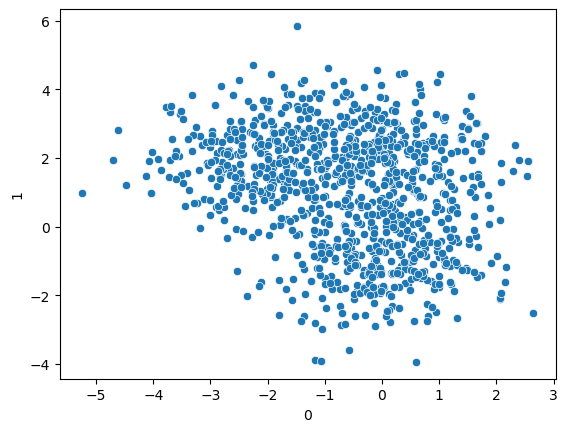

In [13]:
sns.scatterplot(x = pd.DataFrame(X)[0],
                y = pd.DataFrame(X)[1]);

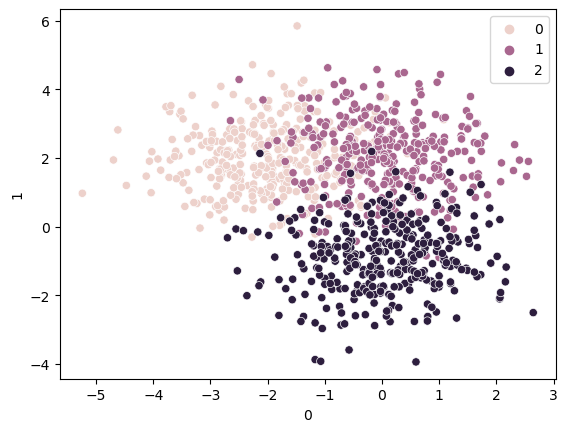

In [14]:
sns.scatterplot(x = pd.DataFrame(X)[0],
                y = pd.DataFrame(X)[1], 
                hue=y);

### Modelo 01

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
model = KNeighborsClassifier(n_neighbors=17, metric='euclidean')

model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.84

In [35]:
df = pd.DataFrame(X)
df[0].fillna

,0,1
0,-1.503286,1.861736
1,-1.352311,3.523030
2,-2.234153,1.765863
3,-0.420787,2.767435
4,-2.469474,2.542560
...,...,...
995,0.800410,-0.245709
996,1.188913,-0.291696
997,0.351448,0.070150
998,-0.026521,-1.881875


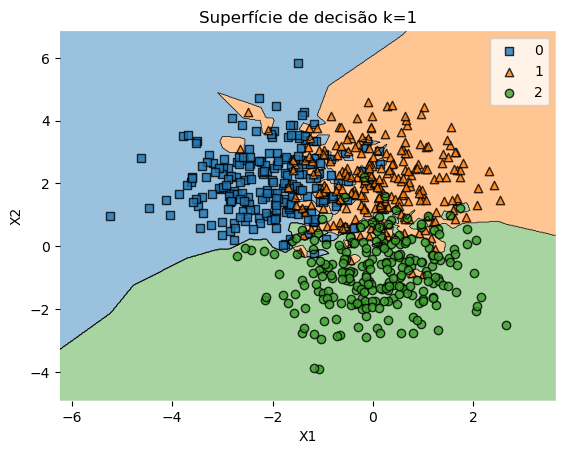

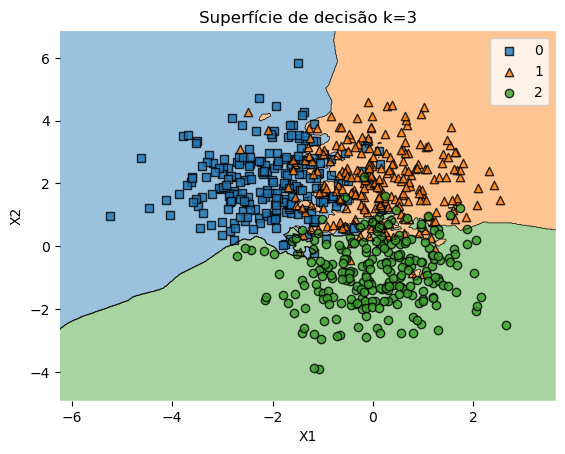

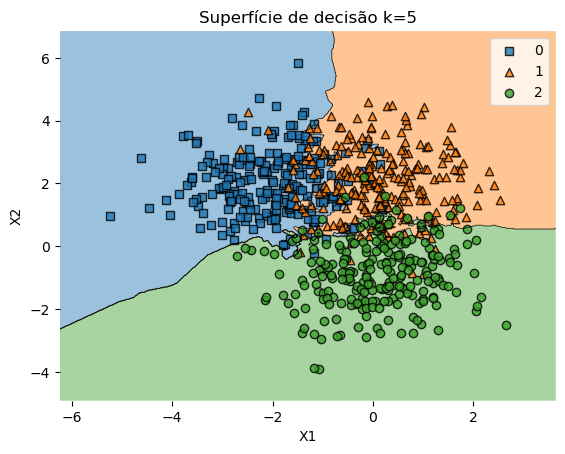

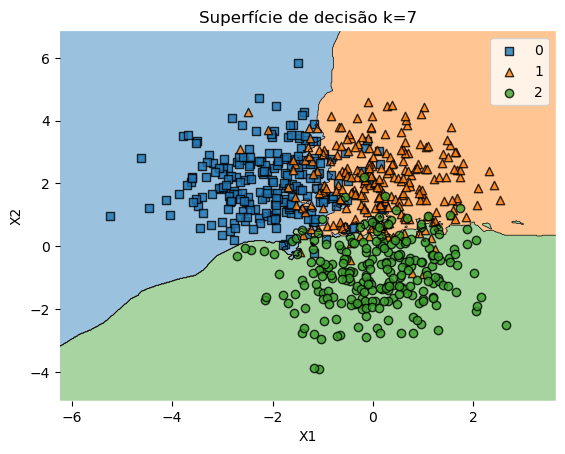

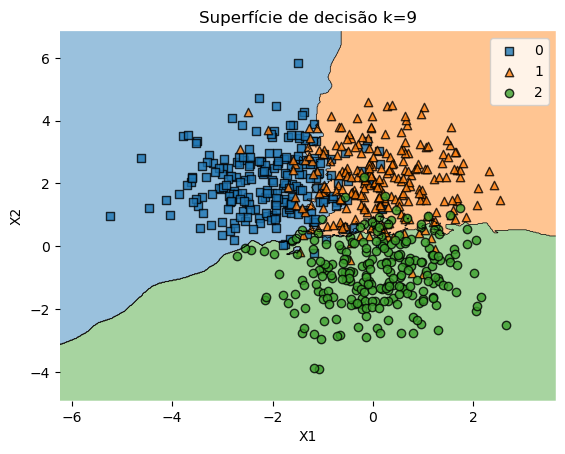

In [33]:
from mlxtend.plotting import plot_decision_regions

ks = [1, 3, 5, 7, 9]
list_acc = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    list_acc.append(accuracy_score(y_test, y_pred))
    plot_decision_regions(X_train, y_train, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Superfície de decisão k={k}')
    plt.legend()
    plt.show()

In [34]:
print('Lista de acurácias:', list_acc)

Lista de acurácias: [0.8366666666666667, 0.82, 0.8066666666666666, 0.8266666666666667, 0.83]


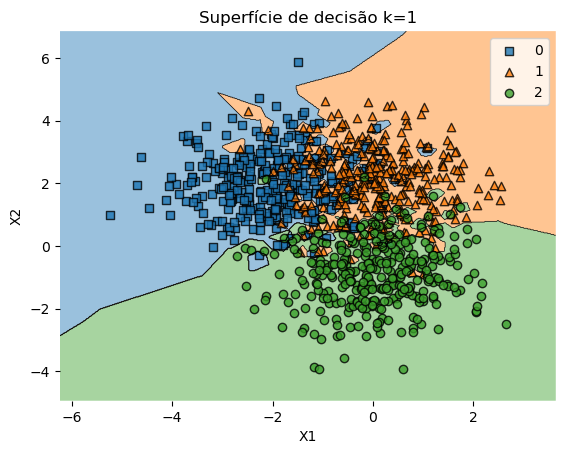

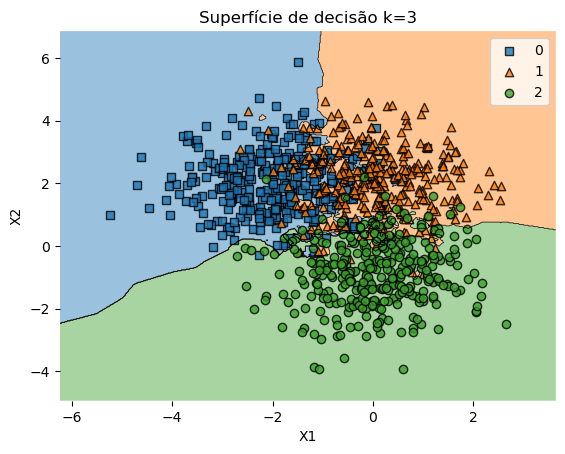

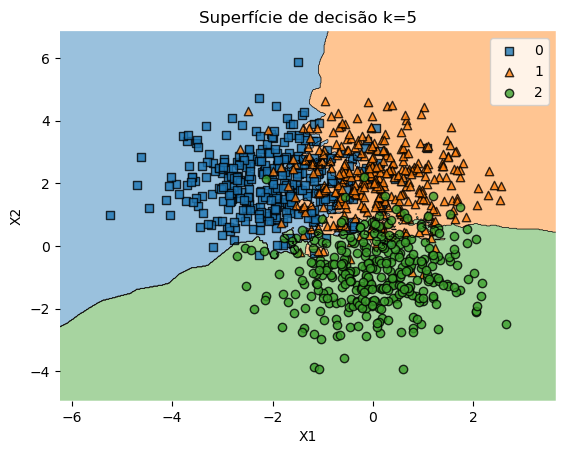

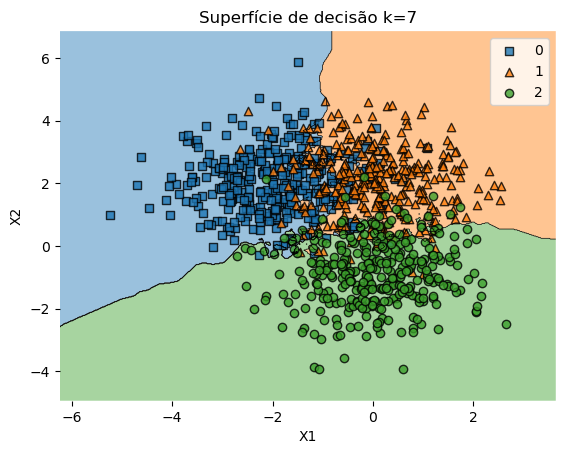

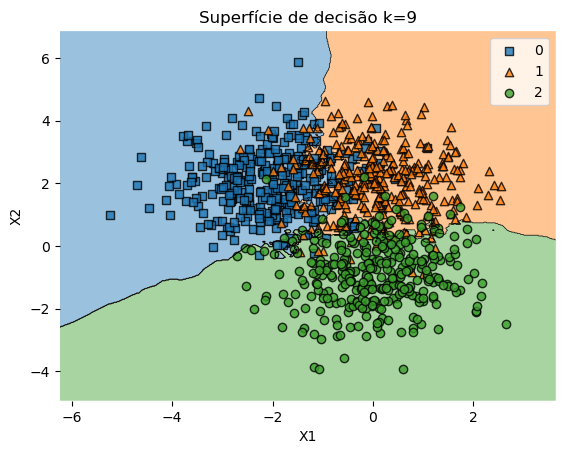

In [36]:
from mlxtend.plotting import plot_decision_regions

ks = [1, 3, 5, 7, 9]
list_acc = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    
    y_pred = model.predict(X)
    list_acc.append(accuracy_score(y, y_pred))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Superfície de decisão k={k}')
    plt.legend()
    plt.show()

,0,1
0,-1.503286,1.861736
1,-1.352311,3.523030
2,-2.234153,1.765863
3,-0.420787,2.767435
4,-2.469474,2.542560
...,...,...
995,0.800410,-0.245709
996,1.188913,-0.291696
997,0.351448,0.070150
998,-0.026521,-1.881875


In [39]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df = pd.concat([df_x, df_y], axis=1)
df.columns = ['X1', 'X2', 'y']

df['y'].value_counts(normalize=True)

0    0.334
1    0.333
2    0.333
Name: y, dtype: float64

## KNN como Regressão

## 

## Exercícios

Utilizando a base de dados do `insurance.csv`, resolva os seguintes exercícios:

- __1)__ Utilize um KNN classificador para definir as classes de _charges_ de acordo com as variáveis. Será preciso construir a target para esse exercício, então utilize o _jointplot_ entre a idade e o _charges_ para definir 3 regiões de separação;

- __2)__ Agora utilize um KNN regressor para definir os valores de _charges_.